## Problem Set 2: Data exploration, descriptive statistics 

### Name: Gabriella Rivera

#### Load and check

1.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df = pd.read_csv("gapminder.csv.bz2", sep = "\t")
# df


2.

In [3]:
print(df.shape)


(13055, 25)


Yes the first few lines of data look reasonable

3.

In [4]:
for col in df.columns:
    print(col, df[col].isna().sum())

iso3 0
name 240
iso2 300
region 241
sub-region 241
intermediate-region 7697
time 36
totalPopulation 76
fertilityRate 1307
lifeExpectancy 1325
childMortality 2600
youthFemaleLiteracy 12134
youthMaleLiteracy 12134
adultLiteracy 12118
GDP_PC 3585
accessElectricity 7608
agriculturalLand 1910
agricultureTractors 6947
cerealProduction 3606
fertilizerHa 4929
co2 2658
greenhouseGases 4994
co2_PC 2661
pm2.5_35 10727
battleDeaths 12051


In [5]:
# Good Variables (ones with no more than ~20% of its data missing):
#   iso3, name, iso2, region, sub-region, time, totalPopulation, fertilityRate, lifeExpectancy, childMortality, GDP_PC, agriculturalLand, co2, co2_PC
# Nearly Unusable (greater than 80% of its data missing):
#  youthFemaleLiteracy, youthMaleLiteracy, adultLiteracy, pm2.5_35, battleDeaths      

4.

In [6]:
countries_1960 = df[df['time'] == 1960.0]['name']
countries_2019 = df[df['time'] == 2019]['name']
countries_1960_unique = df[df['time'] == 1960.0]['name'].nunique() 
countries_2019_unique = df[df['time'] == 2019]['name'].nunique()

print(countries_1960_unique)
print(countries_2019_unique)

212
213


5.


In [7]:
new_country = countries_2019[~countries_2019.isin(countries_1960)]
print(new_country)

9804    Palestine, State of
Name: name, dtype: object


#### Wealth

1.

In [8]:
gdps = df.dropna(subset = 'GDP_PC')
most_recent_gdp_year = gdps.time.max()
print(most_recent_gdp_year)

2019.0


2.

In [9]:
avg_gdp2019 = gdps[gdps['time'] == 2019.0]['GDP_PC'].mean()
print(avg_gdp2019)

15055.352217243244


3.

In [10]:
# pd.set_option('display.max_rows', None)

last_gdp_year = df.dropna(subset=['GDP_PC']).groupby('name')['time'].max()
recent_yrs_missing = most_recent_gdp_year - last_gdp_year
recent_yrs_missing.nlargest()
countries_recent_yrs_missing = recent_yrs_missing.nlargest().index.tolist()
print(countries_recent_yrs_missing)

years = []
for country in countries_recent_yrs_missing:
    years.append(last_gdp_year[country])

gdps = []
for country, year in zip(countries_recent_yrs_missing, years):
    filtered_data = df[(df['name'] == country) & (df['time'] == year)]
    gdp = filtered_data['GDP_PC'].item()
    gdps.append(gdp)

most_recent_gdp_data = {'Country': countries_recent_yrs_missing, 'Last Year of GDP': years, 'GDP': gdps}
pd.DataFrame(data = most_recent_gdp_data)

['Djibouti', 'Faroe Islands', 'Liechtenstein', 'Turks and Caicos Islands', 'Eritrea']


,Country,Last Year of GDP,GDP
0,Djibouti,2010.0,1343.26873
1,Faroe Islands,2010.0,48530.23385
2,Liechtenstein,2010.0,141200.38001
3,Turks and Caicos Islands,2010.0,21028.40784
4,Eritrea,2011.0,537.49137


The reason these countries have issues with newere data is likely due to them being smaller and potentially having less frequent reporting or updates to international datasets.

#### Child mortality over time

1.

In [11]:
df.head()

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,childMortality,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,GDP_PC,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN


In [12]:
no_cm_data1960 = df[df['time'] == 1960]['childMortality'].isna().sum()
# alt = np.sum(df[df.time == 1960].childMortality.isna())
print(no_cm_data1960)
no_cm_data2019 = df[df['time'] == 2019]['childMortality'].isna().sum()
print(no_cm_data2019)

104
24


Yes, data is improving over time.

2.

In [13]:
largest_cm_overall = df.loc[df.childMortality.idxmax(), ['name', 'time']]
print(largest_cm_overall)
smallest_cm_overall = df.loc[df.childMortality.idxmin(), ['name', 'time']]
print(smallest_cm_overall)
# print(df.loc[largest_cm_index])
# print(df.loc[largest_cm_index]['time'])

name      Mali
time    1963.0
Name: 7703, dtype: object
name    San Marino
time        2018.0
Name: 10587, dtype: object


3.

In [14]:
print(df.groupby('region').childMortality.max())

largest_cm_by_region_2019 = df.loc[df[df['time'] == 2019].groupby('region')['childMortality'].idxmax(), ['region', 'name', 'childMortality']]
print(largest_cm_by_region_2019)

smallest_cm_by_region_2019 = df.loc[df[df['time'] == 2019].groupby('region')['childMortality'].idxmin(), ['region', 'name', 'childMortality']]
print(smallest_cm_by_region_2019)


region
Africa      420.6
Americas    287.9
Asia        409.8
Europe      114.5
Oceania     197.4
Name: childMortality, dtype: float64
        region                  name  childMortality
8603    Africa               Nigeria           117.2
5176  Americas                 Haiti            62.8
9144      Asia              Pakistan            67.2
7399    Europe  Moldova, Republic of            14.4
6199   Oceania              Kiribati            50.9
         region        name  childMortality
6679     Africa       Libya            11.5
1986   Americas      Canada             4.9
2890       Asia      Cyprus             2.3
10588    Europe  San Marino             1.7
663     Oceania   Australia             3.6


#### 4. Graphical Analysis

1.

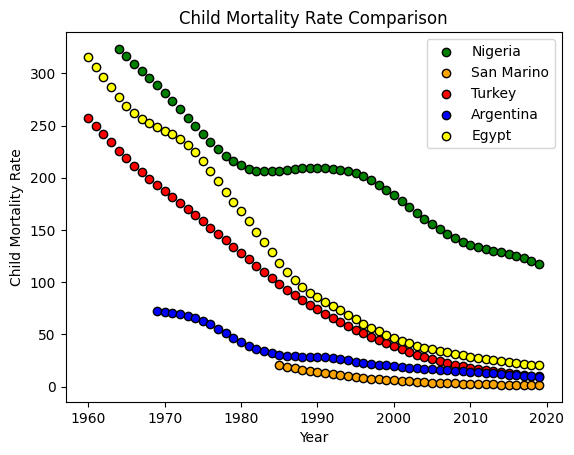

In [15]:
# df_max_mortality = df[df['Country'] == country_max_mortality]
# df_min_mortality = df[df['Country'] == country_min_mortality]

# First, retrieve the data for each country and the corresponding years.
nigeria = df[df['name'] == 'Nigeria']
san_marino = df[df['name'] == 'San Marino']
turkey = df[df['name'] == 'Turkey']
argentina = df[df['name'] == 'Argentina']
egypt = df[df['name'] == 'Egypt']
years_nigeria = nigeria['time']
years_san_marino = san_marino['time']
years_turkey = turkey['time']
years_argentina = argentina['time']
years_egypt = egypt['time']


# Create scatter plots for each country.
plt.scatter(years_nigeria, nigeria['childMortality'], color='green', label='Nigeria', edgecolor='k')
plt.scatter(years_san_marino, san_marino['childMortality'], color='orange', label='San Marino', edgecolor='k')
plt.scatter(years_turkey, turkey['childMortality'], color='red', label='Turkey', edgecolor='k')
plt.scatter(years_argentina, argentina['childMortality'], color='blue', label='Argentina', edgecolor='k')
plt.scatter(years_egypt, egypt['childMortality'], color='yellow', label='Egypt', edgecolor='k')

# Add labels and legend.
plt.xlabel('Year')
plt.ylabel('Child Mortality Rate')
plt.title('Child Mortality Rate Comparison')
plt.legend()

# Show the plot.
plt.show()

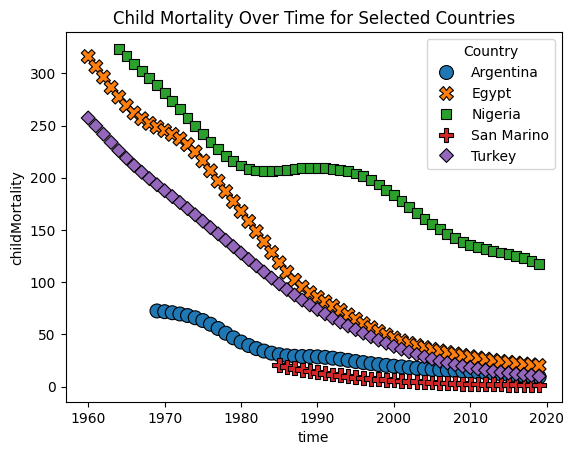

In [16]:
import seaborn as sns

countries_of_interest = ['Nigeria', 'San Marino', 'Turkey', 'Argentina', 'Egypt']
df_filtered = df[df['name'].isin(countries_of_interest)]

sns.scatterplot(data=df_filtered, x='time', y='childMortality', hue='name', style='name', s=100, edgecolor='k')

plt.title('Child Mortality Over Time for Selected Countries')

plt.legend(title='Country')
plt.show()

2.

In [17]:
# I wanted to use both Matplotlib and Seaborn, just so that in the future I can reference how to use each. The data results are as expected, Nigeria with the highest infant mortality
# rates and San Marino with the lowest. Egypt is in Africa, so I was curious as to how close the number would be to Nigeria. 

#### Desctiptive Stats 

1.

In [18]:
missing_1960_gdp = df[df['time'] == 1960.0]['GDP_PC'].isna().sum()
missing_2019_gdp = df[df['time'] == 2019.0]['GDP_PC'].isna().sum()
print(missing_1960_gdp)
print(missing_2019_gdp)

125
32


2.

In [19]:
max_gdp_1960 = df[df['time'] == 1960.0]['GDP_PC'].max()
print(max_gdp_1960)
min_gdp_1960 = df[df['time'] == 1960.0]['GDP_PC'].min()
print(min_gdp_1960)
med_gdp_1960 = df[df['time'] == 1960.0]['GDP_PC'].median()
print(med_gdp_1960)
mean_gdp_1960 = df[df['time'] == 1960.0]['GDP_PC'].mean()
print(mean_gdp_1960)

33362.70762
153.34393
1751.86291
5050.29503978022


In [20]:
max_gdp_2019 = df[df['time'] == 2019.0]['GDP_PC'].max()
print(max_gdp_2019)
min_gdp_2019 = df[df['time'] == 2019.0]['GDP_PC'].min()
print(min_gdp_2019)
med_gdp_2019 = df[df['time'] == 2019.0]['GDP_PC'].median()
print(med_gdp_2019)
mean_gdp_2019 = df[df['time'] == 2019.0]['GDP_PC'].mean()
print(mean_gdp_2019)

111043.5317
208.07473
5922.52759
15055.352217243244


3. These figures do suggest that the world has become richer, and more unequal.

4.

In [21]:
gdp_data_1960 = df[df['time'] == 1960.0]['GDP_PC']
gdp_data_2019 = df[df['time'] == 2019.0]['GDP_PC']

std_1960 = np.std(gdp_data_1960)
std_2019 = np.std(gdp_data_2019)
print(std_1960)
print(std_2019)

coefficient_of_variation_1960 = np.std(gdp_data_1960, ddof=1) / np.mean(gdp_data_1960)
print(coefficient_of_variation_1960)
coefficient_of_variation_2019 = np.std(gdp_data_2019, ddof=1) / np.mean(gdp_data_2019)
print(coefficient_of_variation_2019)

6791.880726637599
20486.884633722584
1.3522990456704
1.364463599690048


My standard deviation ratio results in a drastically higher number than my standard deviation-to mean ratio. It leaves me unsure of whether or not I did these computations correctly.

5.

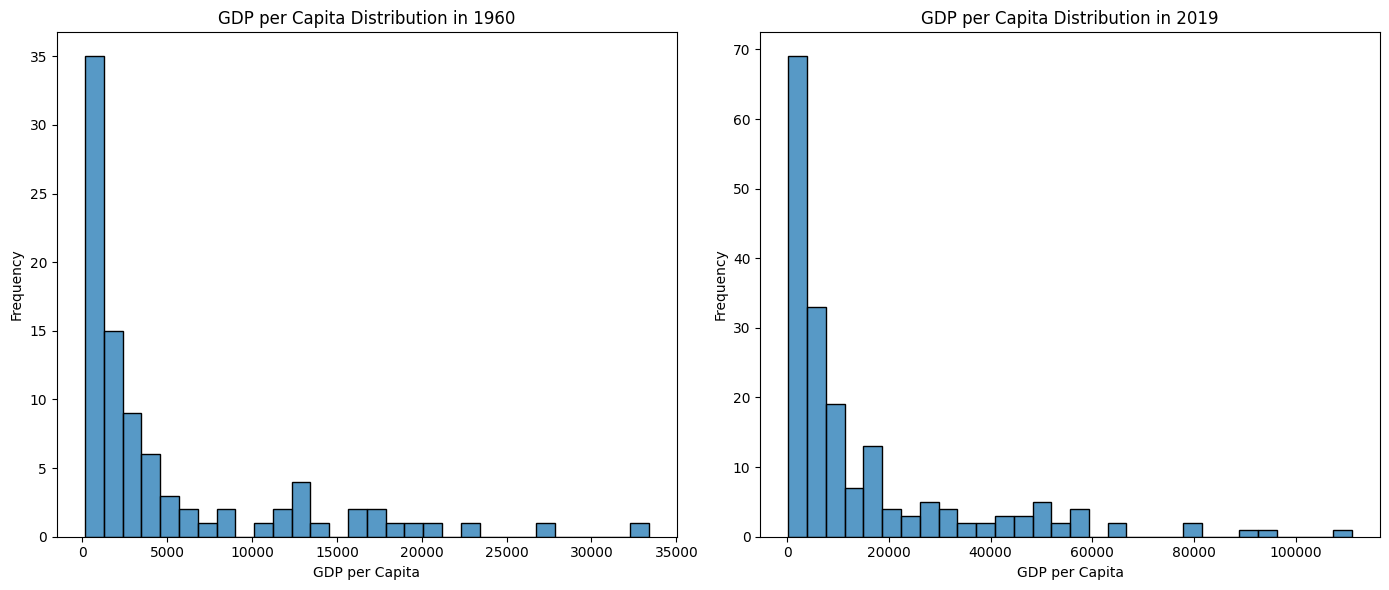

In [33]:
# gdp_1960 = df[(df['time'] == 1960.0) & df['GDP_PC'].notna()]['GDP_PC']
# gdp_2019 = df[(df['time'] == 2019.0) & df['GDP_PC'].notna()]['GDP_PC']
gdp_1960 = df[(df['time'] == 1960.0)]['GDP_PC']
gdp_2019 = df[(df['time'] == 2019.0)]['GDP_PC']

# Create figsize so that plot has appropriate width
plt.figure(figsize=(14, 6))

# First subplot for 1960
plt.subplot(1, 2, 1)
sns.histplot(gdp_1960, bins=30, kde=False)
plt.title('GDP per Capita Distribution in 1960')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')

# Second subplot for 2019
plt.subplot(1, 2, 2)
sns.histplot(gdp_2019, bins=30, kde=False)
plt.title('GDP per Capita Distribution in 2019')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

6. Both histograms suggest increasing global wealth disparity through a variety of factors. The GDP per capita has increased significantly among wealthier countries, as seen by the shift to the right for the distribution in the 2019 histogram as compared to 1960. This suggests an overall increase in GDP per capita across the countries represented, although GDP still remains on the low end for the majority of counties. The wider spread in 2019 as compared to 1960 also indicates that the variation in GDP per capita among different countries has increased, pointing to growing economic disparities. The precense of outliers further to the right on the 2019 plot indicate the presence of countries with exceptionally high GDP per capita compared to the rest.

7.

In [39]:
gdp_1960 = df[(df['time'] == 1960.0) & df['GDP_PC'].notna()]['GDP_PC']
gdp_1960_sorted = gdp_1960.sort_values() 

quintile_size = len(gdp_1960_sorted) // 5

# sum the GDP per capita for the bottom and top quintiles
sum_bottom_quintile = np.sum(gdp_1960_sorted[:quintile_size])
sum_top_quintile = np.sum(gdp_1960_sorted[-quintile_size:])

QSR_1960 = sum_top_quintile / sum_bottom_quintile
print(QSR_1960)

48.44796581082919


In [40]:
gdp_2019 = df[(df['time'] == 2019.0) & df['GDP_PC'].notna()]['GDP_PC']
gdp_2019_sorted = gdp_2019.sort_values()

quintile_size = len(gdp_2019_sorted) // 5

# sum the GDP per capita for the bottom and top quintiles
sum_bottom_quintile = np.sum(gdp_2019_sorted[:quintile_size])
sum_top_quintile = np.sum(gdp_2019_sorted[-quintile_size:])

QSR_2019 = sum_top_quintile / sum_bottom_quintile
print(QSR_2019)

57.22513517688508


Since the QSR in 2019 is higher than in 1960, this indicates that the disparity between the top and bottom 20% of GDP per capita among the countries considered has indeed increased. A higher QSR suggests greater inequality, as the top quintile is earning many more times the GDP per capita than the bottom quintile.

8. Combining the shift and the increased spread in the 2019 histogram with the calculated QSR suggests that while the world has seen economic growth over the 59-year period, this growth has not been evenly distributed among countries, and in fact, inequality appears to have increased.

I spent too long on this problem set. My ide kept crashing and it was buggy throughout most of the assignment.